<a href="https://colab.research.google.com/github/subho2026/NLP-Beginners/blob/main/NLP_04_WE_word2vec_en_Subhankar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# As usual we start with import

In [ ]:
import gensim
from nltk.data import find
import nltk
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec


It appears that NLTK had word2vec stuff all time along

Sigh ...

In [ ]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to /root/nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

Let's load the pruned version (which has only most popular words)

In [ ]:
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

Total number of Words here

Each word is represented by 300 features

In [ ]:
len(model['word'])

300

# Trying to make sense of word embeddings

In [ ]:
model['word']

array([ 1.33147e-01,  1.53771e-02,  3.34677e-02,  2.02616e-02,
       -5.46338e-02,  1.76384e-02, -3.14778e-02, -7.56190e-02,
        1.15057e-01, -3.91211e-03, -2.27942e-02, -5.75283e-02,
       -5.64429e-02,  3.16587e-02, -1.00403e-02,  1.42555e-01,
        1.77289e-02,  9.58806e-03,  1.66434e-02, -1.03479e-01,
        3.36939e-03,  1.51238e-01,  8.90061e-02, -1.13609e-01,
       -6.69355e-02,  1.75480e-02, -9.76896e-02,  3.36487e-02,
        5.10157e-02, -2.67120e-04,  9.90464e-03,  7.12773e-02,
       -8.50262e-03,  3.59552e-03, -2.73169e-02,  1.59198e-01,
       -2.93973e-03,  3.94377e-02,  1.04021e-02, -8.50262e-02,
       -7.10059e-03, -8.77398e-03,  1.30253e-02,  6.36792e-02,
       -4.16085e-02,  2.31561e-02, -6.29555e-02,  4.81212e-02,
       -5.71665e-02,  5.86138e-02, -2.87642e-02,  6.62119e-02,
       -6.40410e-02,  3.69050e-02,  1.46173e-01,  2.38797e-02,
       -2.53269e-02, -1.17951e-01,  2.20706e-02, -3.79904e-03,
        3.47341e-02,  3.05732e-02, -9.36192e-03,  4.070

In [ ]:
def plot_we_signle(word):
    fig = plt.figure(figsize = (15,5))
    plt.imshow(model[word].reshape(15,20), cmap = 'bwr', vmin = -0.15, vmax = 0.15)
    plt.title('Word2Vec representation of word: '+word)
    plt.colorbar();

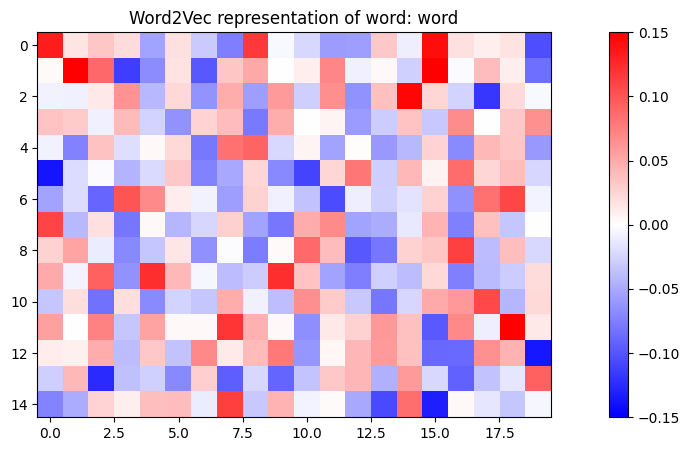

In [ ]:
plot_we_signle('word')

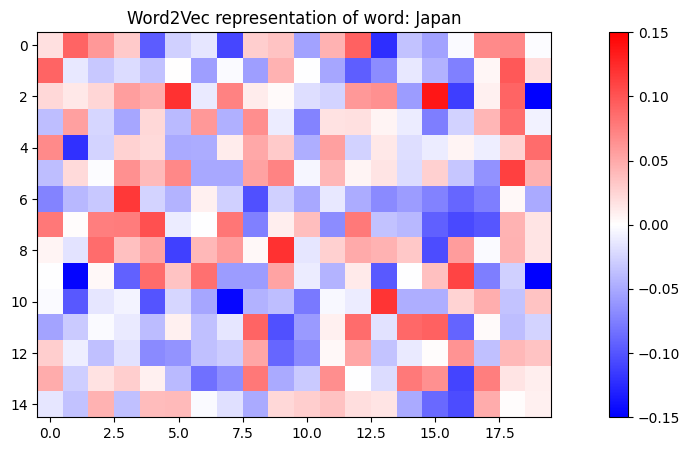

In [ ]:
plot_we_signle('Japan')

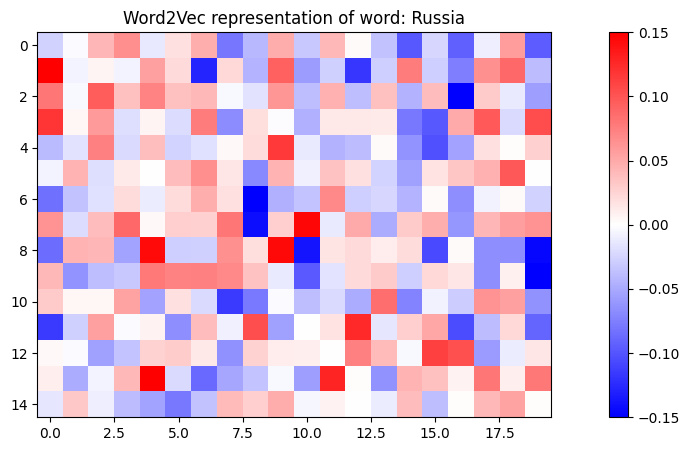

In [ ]:
plot_we_signle('Russia')

In [ ]:
def plot_we_multi(words):
    data = []
    for word in words:
        data.append(model[word])
    fig = plt.figure(figsize = (30,len(words)))
    plt.imshow(data,
               cmap = 'bwr', vmin = -0.15, vmax = 0.15,
               interpolation = None, aspect = 'auto')
    plt.title('Word2Vec representation of words')
    plt.grid()
    plt.yticks(np.arange(len(words)), words)
    plt.colorbar();

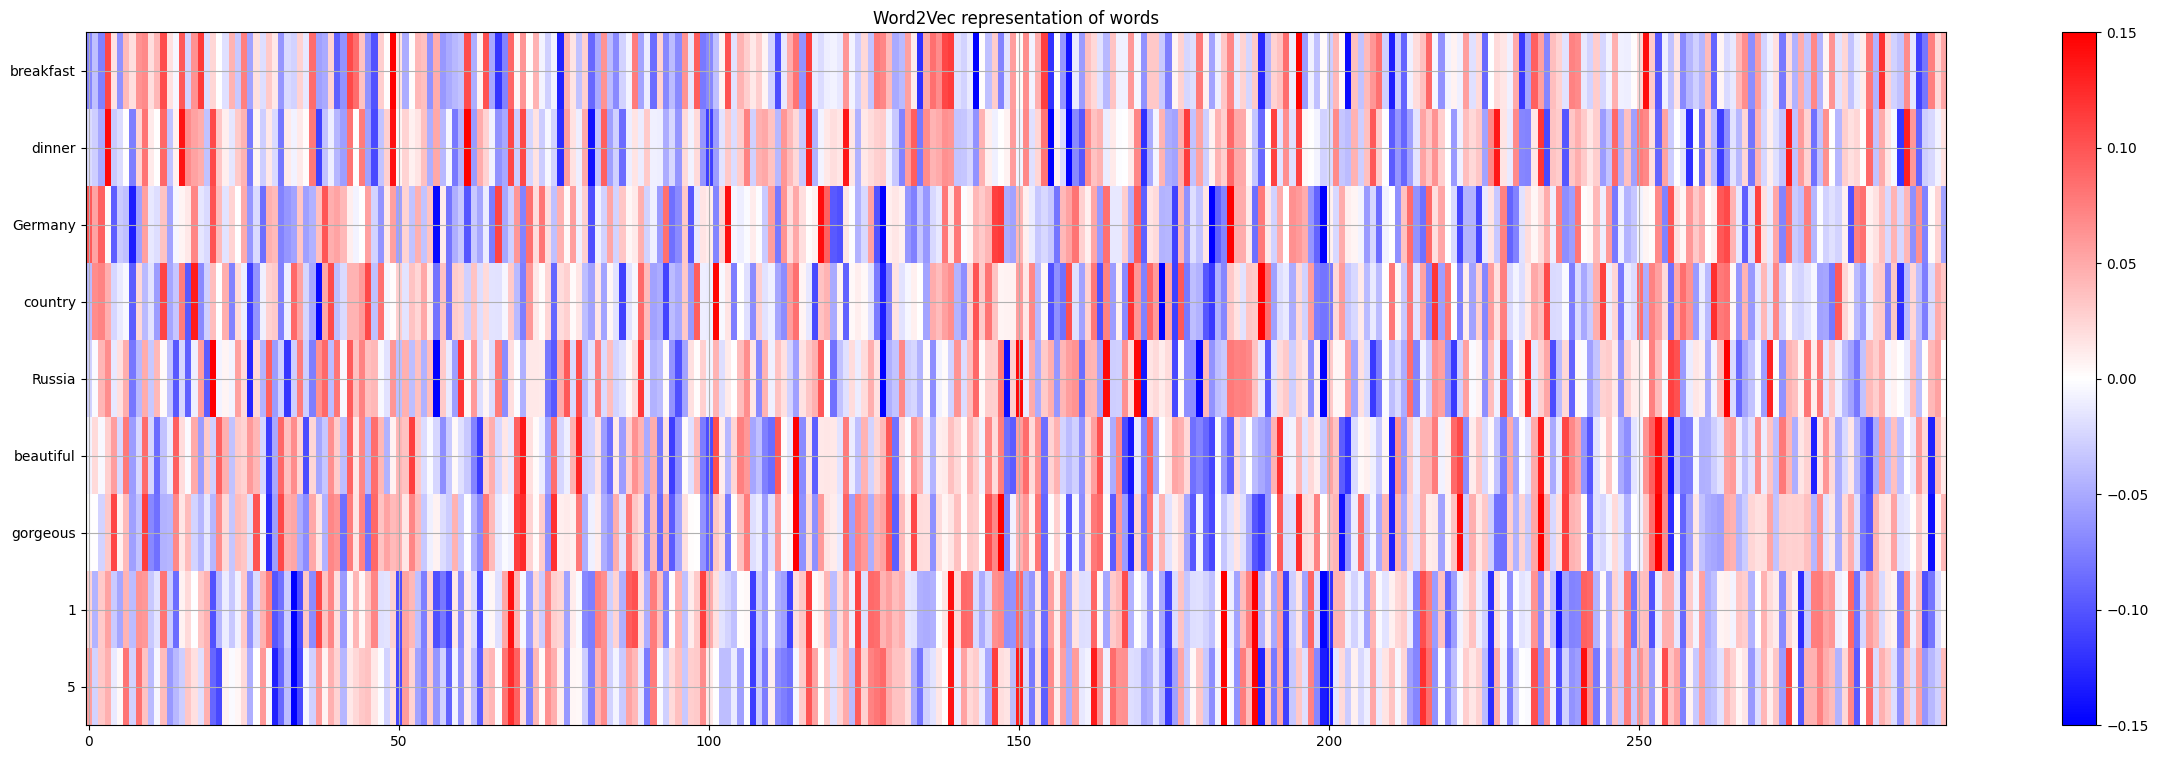

In [ ]:
words = ['breakfast', 'dinner', 'Germany', 'country', 'Russia','beautiful','gorgeous', '1', '5']
plot_we_multi(words)

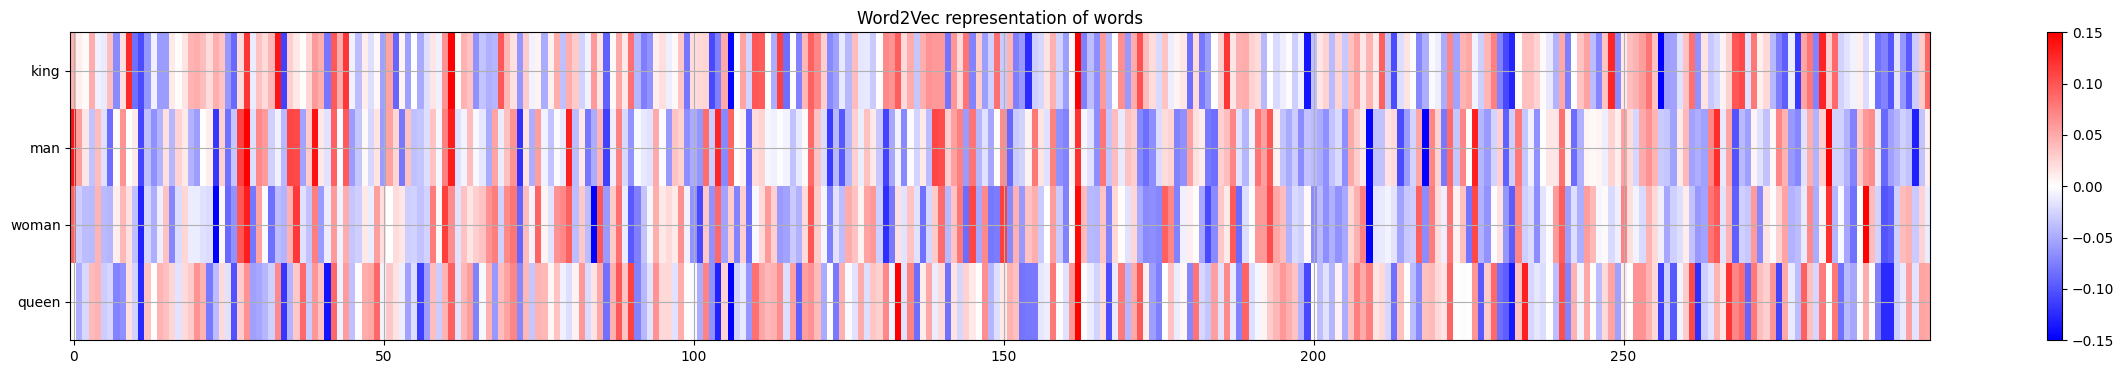

In [ ]:
words = ['king', 'man', 'woman', 'queen']
plot_we_multi(words)

In [ ]:
def plot_we_multi_alg(words):
    data = []
    for word in words:
        data.append(model[word])
    data.append(data[0]-data[1]+data[2])
    words.append(words[0]+'-'+words[1]+'+'+words[2])
    fig = plt.figure(figsize = (30,len(words)))
    plt.imshow(data,
               cmap = 'bwr', vmin = -.15, vmax = .15,
               interpolation = None, aspect = 'auto')
    plt.title('Word2Vec representation of words')
    plt.grid()
    plt.yticks(np.arange(len(words)), words)
    plt.colorbar();

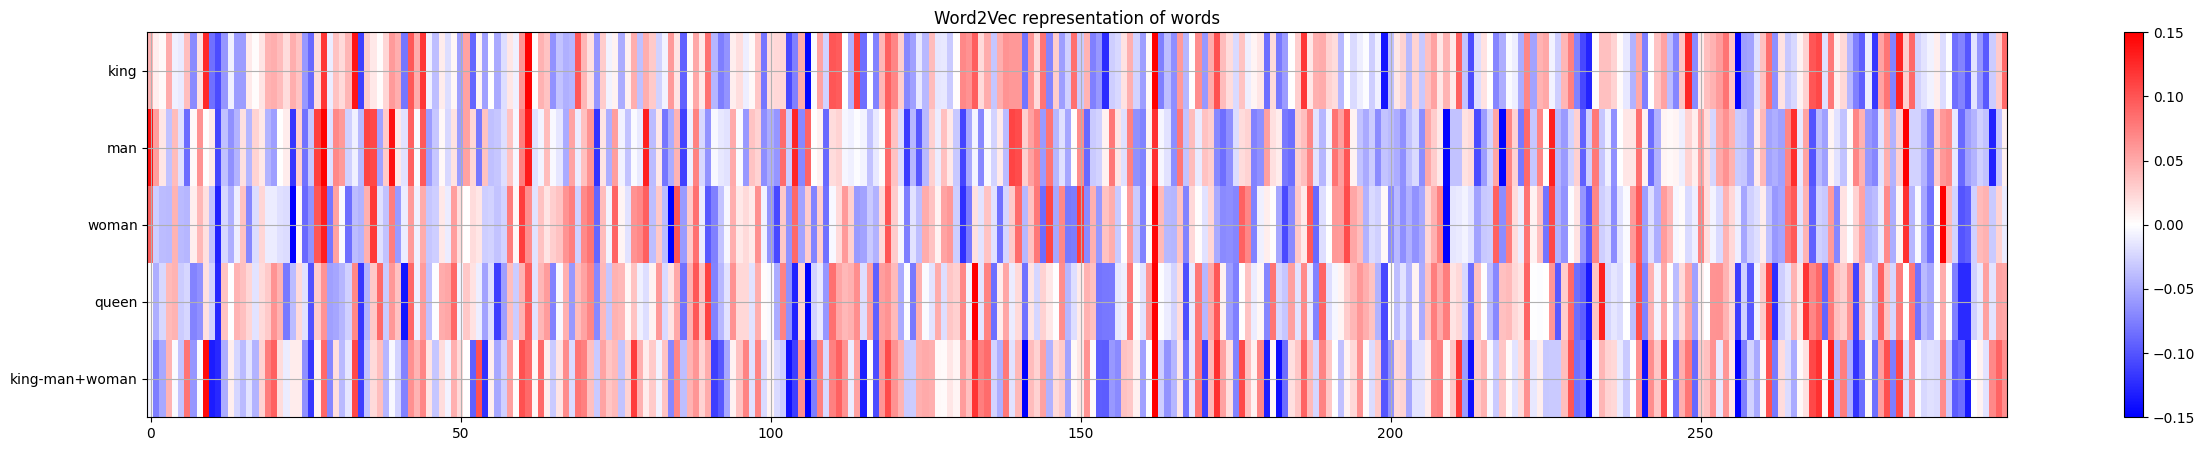

In [ ]:
words = ['king', 'man', 'woman', 'queen']
plot_we_multi_alg(words)

# Task

Plot different Parts of Speech, different topics
Try group them in Pairs (like two different countries and so on)

Visualize at least 15 WE


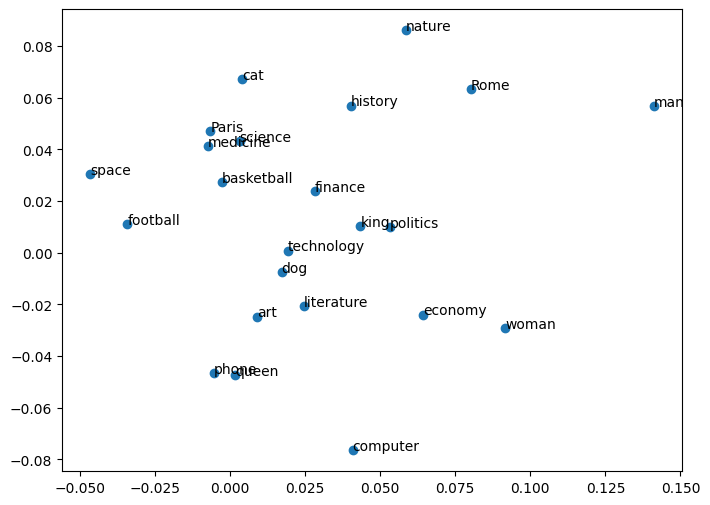

In [ ]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from nltk.data import find

# Load the pre-trained Word2Vec model
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

# Define a function to plot word embeddings for multiple words
def plot_word_embeddings(words):
    data = [model[word] for word in words]
    data_array = np.array(data)
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(data_array[:, 0], data_array[:, 1])
    for i, word in enumerate(words):
        plt.text(data[i][0], data[i][1], word)
    plt.show()

# List of words to visualize for different parts of speech and topics
word_list = ['king', 'queen', 'man', 'woman', 'dog', 'cat', 'computer', 'phone', 'Paris', 'Rome', 'football', 'basketball', 'finance', 'politics', 'science', 'technology', 'medicine', 'literature', 'history', 'art', 'nature', 'space', 'economy']

# Plot the word embeddings for the list of words
plot_word_embeddings(word_list)


# Finding 'synonyms' using word2vec

In [ ]:
model.most_similar(positive=['university'], topn = 5)

[('universities', 0.7003918290138245),
 ('faculty', 0.6780906915664673),
 ('undergraduate', 0.6587096452713013),
 ('campus', 0.6434987783432007),
 ('college', 0.638526976108551)]

In [ ]:
model.most_similar(positive=['river'], topn = 5)

[('creek', 0.7994444370269775),
 ('lake', 0.7919586896896362),
 ('rivers', 0.7777560949325562),
 ('riverbank', 0.7283666133880615),
 ('River', 0.7170898914337158)]

In [ ]:
model.most_similar(positive=['table'], topn = 5)

[('tables', 0.6950636506080627),
 ('tray', 0.4653455317020416),
 ('sideboard', 0.4434099793434143),
 ('Tables', 0.4419552981853485),
 ('napkin', 0.42967039346694946)]

In [ ]:
model.most_similar(positive=['tiger'], topn = 5)

[('elephant', 0.6681443452835083),
 ('elephants', 0.640099287033081),
 ('tigress', 0.598202645778656),
 ('cheetah', 0.5816307663917542),
 ('lions', 0.5742772221565247)]

In [ ]:
model.most_similar(positive=['cat'], topn = 5)

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464984059333801),
 ('feline', 0.7326232194900513),
 ('puppy', 0.7075453400611877)]

# Playing 'what word is extra' game

In [ ]:
model.doesnt_match('breakfast cereal dinner lunch'.split())

'cereal'

In [ ]:
model.doesnt_match('cat dog table tiger'.split())

'table'

# Our favourite linear algebra

Standard `queen = (king - man) + woman`

In [ ]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902430415153503),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236843228340149)]

word2vec *knows* math

`4 + 5 - 3 = ?`

In [ ]:
model.most_similar(positive=['4', '5'], negative=['3'], topn=5)

[('6', 0.9177099466323853),
 ('8', 0.9096771478652954),
 ('7', 0.883624792098999),
 ('9', 0.8472416996955872),
 ('2', 0.819900393486023)]

In [ ]:
model.most_similar(positive=['2', '5'], negative=['3'], topn=5)

[('4', 0.9100943803787231),
 ('6', 0.9001395106315613),
 ('1', 0.8842741250991821),
 ('8', 0.8796557784080505),
 ('7', 0.85642009973526)]

word2vec *knows* forms of adjective

`bad - worse + good = ?`

In [ ]:
model.most_similar(positive=['worse', 'good'], negative=['bad'], topn=5)

[('better', 0.7350090146064758),
 ('stronger', 0.5315819978713989),
 ('nicer', 0.5277354121208191),
 ('happier', 0.527080774307251),
 ('decent', 0.5012362003326416)]

`worst - bad + good = ?`

In [ ]:
model.most_similar(positive=['worst', 'good'], negative=['bad'], topn=5)

[('best', 0.693242073059082),
 ('strongest', 0.6262709498405457),
 ('greatest', 0.5748811364173889),
 ('weakest', 0.5727126002311707),
 ('finest', 0.5371615886688232)]

word2vec *knows* tenses of verbs

`went - go + swim = ?`

In [ ]:
model.most_similar(positive=['went', 'swim'], negative=['go'], topn=5)

[('swam', 0.7314256429672241),
 ('swimming', 0.6467223167419434),
 ('swum', 0.5818623900413513),
 ('swimmers', 0.569441020488739),
 ('Swim', 0.5257592797279358)]

In [ ]:
model.most_similar(positive=['gone', 'swim'], negative=['go'], topn=5)

[('swum', 0.7135366797447205),
 ('swimming', 0.6843574643135071),
 ('swam', 0.6526591777801514),
 ('swimmers', 0.5992928147315979),
 ('Swim', 0.5154380202293396)]

word2vec *knows* georgaphy

`Moscow - Russia + Japan = ?`

In [ ]:
model.most_similar(positive=['Moscow', 'Japan'], negative=['Russia'], topn=5)

[('Tokyo', 0.8696038126945496),
 ('Osaka', 0.6701730489730835),
 ('Japanese', 0.6677039861679077),
 ('Seoul', 0.6629883646965027),
 ('Chiba', 0.600885272026062)]

word2vec *knows* plural forms

In [ ]:
model.most_similar(positive=['king', 'queens'], negative=['kings'], topn=5)

[('queen', 0.7601928114891052),
 ('princess', 0.5552756190299988),
 ('monarch', 0.5157448649406433),
 ('prince', 0.46392661333084106),
 ('Queen', 0.4422646164894104)]

# Task

Analyse other different cases of liniear algebra between words

Try different Parts of Speech, different topics

At least 10 different cases

In [ ]:
print(model.most_similar(positive=['university'], topn=5))

print(model.most_similar(positive=['river'], topn=5))

print(model.most_similar(positive=['table'], topn=5))

print(model.most_similar(positive=['tiger'], topn=5))

print(model.most_similar(positive=['cat'], topn=5))

print(model.doesnt_match('breakfast cereal dinner lunch'.split()))

print(model.doesnt_match('cat dog table tiger'.split()))

print(model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5))

print(model.most_similar(positive=['4', '5'], negative=['3'], topn=5))

print(model.most_similar(positive=['worse', 'good'], negative=['bad'], topn=5))


[('universities', 0.7003918290138245), ('faculty', 0.6780906915664673), ('undergraduate', 0.6587096452713013), ('campus', 0.6434987783432007), ('college', 0.638526976108551)]
[('creek', 0.7994444370269775), ('lake', 0.7919586896896362), ('rivers', 0.7777560949325562), ('riverbank', 0.7283666133880615), ('River', 0.7170898914337158)]
[('tables', 0.6950636506080627), ('tray', 0.4653455317020416), ('sideboard', 0.4434099793434143), ('Tables', 0.4419552981853485), ('napkin', 0.42967039346694946)]
[('elephant', 0.6681443452835083), ('elephants', 0.640099287033081), ('tigress', 0.598202645778656), ('cheetah', 0.5816307663917542), ('lions', 0.5742772221565247)]
[('cats', 0.8099379539489746), ('dog', 0.760945737361908), ('kitten', 0.7464984059333801), ('feline', 0.7326232194900513), ('puppy', 0.7075453400611877)]
cereal
table
[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902430415153503), ('prince', 0.5377321243286133), ('kings', 0.5236843228340149)]
[('6', 0

# Let's do Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=4)

In [ ]:
X = []
for word in model.vocab.keys():
    X.append(model[word])

X = np.array(X)

AttributeError: ignored

In [ ]:
pca.fit(X)
pca_emb = pca.transform(X)

In [ ]:
fig = plt.figure(figsize = (15,15))
plt.scatter(pca_emb[:,0],pca_emb[:,1],
            alpha = 0.7, s = 100)

plt.scatter(pca_emb[17214,0],pca_emb[17214,1],
            alpha = 0.7, s = 200)
plt.text(pca_emb[17214,0],pca_emb[17214,1],
         list(model.vocab.keys())[17214])

plt.scatter(pca_emb[37584,0],pca_emb[37584,1],
            alpha = 0.7, s = 200)
plt.text(pca_emb[37584,0],pca_emb[37584,1],
         list(model.vocab.keys())[37584])

plt.scatter(pca_emb[8138,0],pca_emb[8138,1],
            alpha = 0.7, s = 200)
plt.text(pca_emb[8138,0],pca_emb[8138,1],
         list(model.vocab.keys())[8138])

plt.scatter(pca_emb[22375,0],pca_emb[22375,1],
            alpha = 0.7, s = 200)
plt.text(pca_emb[22375,0],pca_emb[22375,1],
         list(model.vocab.keys())[22375])

plt.grid();

In [ ]:
fig = plt.figure(figsize = (15,15))
plt.scatter(pca_emb[:,2],pca_emb[:,3],
            alpha = 0.7, s = 100)

plt.scatter(pca_emb[17214,2],pca_emb[17214,3],
            alpha = 0.7, s = 200)
plt.text(pca_emb[17214,2],pca_emb[17214,3],
         list(model.vocab.keys())[17214])

plt.scatter(pca_emb[37584,2],pca_emb[37584,3],
            alpha = 0.7, s = 200)
plt.text(pca_emb[37584,2],pca_emb[37584,3],
         list(model.vocab.keys())[37584])

plt.scatter(pca_emb[8138,2],pca_emb[8138,3],
            alpha = 0.7, s = 200)
plt.text(pca_emb[8138,2],pca_emb[8138,3],
         list(model.vocab.keys())[8138])

plt.scatter(pca_emb[22375,2],pca_emb[22375,3],
            alpha = 0.7, s = 200)
plt.text(pca_emb[22375,2],pca_emb[22375,3],
         list(model.vocab.keys())[22375])

plt.grid();

In [ ]:
list(model.vocab.keys()).index('Japan')

In [ ]:
list(model.vocab.keys())[8138]

# Task

write a function that visualizes different words on scatter plot

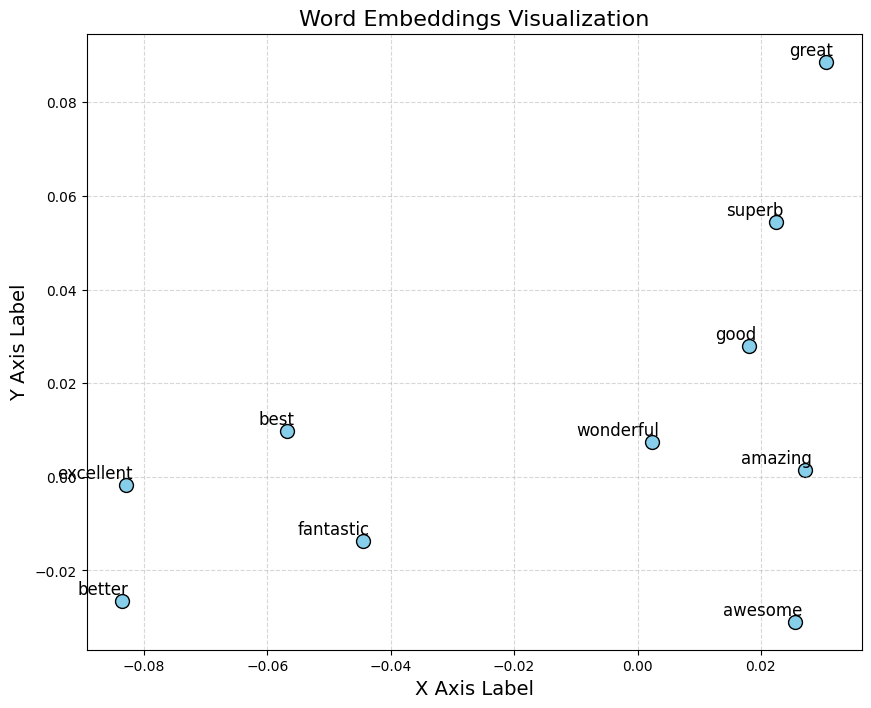

In [11]:
import matplotlib.pyplot as plt

def visualize_words_on_scatter_plot(model, words):
    embeddings = [model[word] for word in words]
    x = [embedding[0] for embedding in embeddings]
    y = [embedding[1] for embedding in embeddings]

    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, marker='o', color='skyblue', edgecolors='black', s=100)

    for i, word in enumerate(words):
        plt.annotate(word, xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=12)

    plt.title('Word Embeddings Visualization', fontsize=16)
    plt.xlabel('X Axis Label', fontsize=14)
    plt.ylabel('Y Axis Label', fontsize=14)
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()

# Modify the word_list with your preferred words
word_list = ['good', 'better', 'best', 'excellent', 'fantastic', 'great', 'amazing', 'wonderful', 'superb', 'awesome']

visualize_words_on_scatter_plot(model, word_list)


# Task

Use t-SNE as alternative visualization method

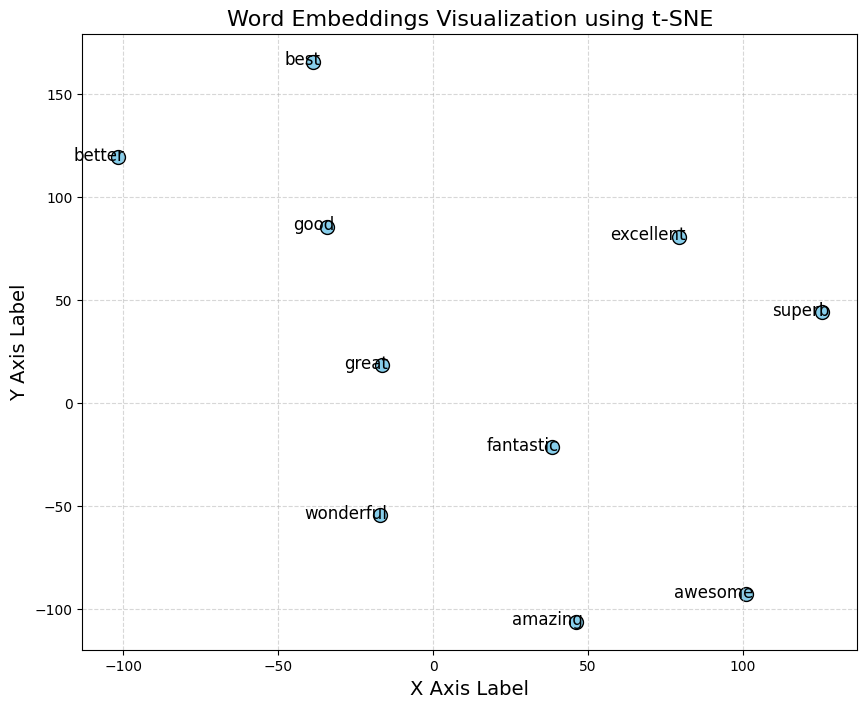

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_words_with_tsne(model, words):
    embeddings = [model[word] for word in words]
    embeddings = np.array(embeddings)  # Convert the list to a NumPy array
    embeddings_2d = TSNE(n_components=2, perplexity=5).fit_transform(embeddings)  # Reducing perplexity value
    x = [embedding[0] for embedding in embeddings_2d]
    y = [embedding[1] for embedding in embeddings_2d]

    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, marker='o', color='skyblue', edgecolors='black', s=100)

    for i, word in enumerate(words):
        plt.annotate(word, xy=(x[i], y[i]), xytext=(5, -5), textcoords='offset points', ha='right', va='bottom', fontsize=12)

    plt.title('Word Embeddings Visualization using t-SNE', fontsize=16)
    plt.xlabel('X Axis Label', fontsize=14)
    plt.ylabel('Y Axis Label', fontsize=14)
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()

# Modify the word_list with your preferred words
word_list = ['good', 'better', 'best', 'excellent', 'fantastic', 'great', 'amazing', 'wonderful', 'superb', 'awesome']

visualize_words_with_tsne(model, word_list)
